Check Python version

In [82]:
!python --version

Python 3.10.13


Import libraries

In [83]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [84]:
# Through online GitHub
file_name = 'https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv'

In [85]:
train_df = pd.read_csv(file_name)

In [86]:
train_df.shape

(144, 2)

In [87]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [88]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [89]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Define the required time and target columns

In [90]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [91]:
train_df[target_col] = train_df[target_col].astype(float)

In [92]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

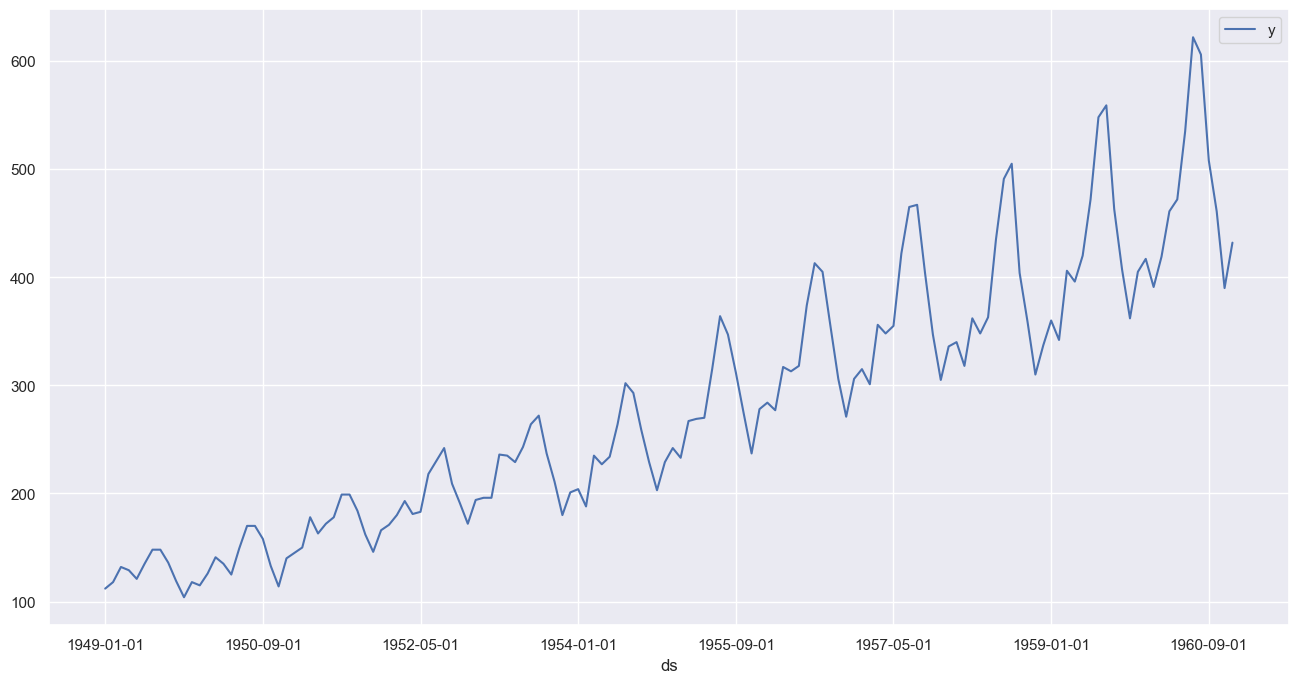

In [93]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [94]:
train_data = []

In [95]:
for value in train_df.values:
    train_data.append(list(value))

In [96]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [138]:
# # Default model request
# model_request = {
#     'type': 'meta_lr',  # 'meta_wa'
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'preprocessors': [
#             {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
#             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             # {'type': 'darts_rnn'},
#             {'type': 'darts_lightgbm'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autoets'},
#             # {'type': 'stats_autotheta'},
#             # {'type': 'stats_autoarima'},
#             # {'type': 'stats_autoets'},
#         ],
#     },
# }

# Customized model request
# model_request = {
#     'type': 'meta_wa',
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'base_models': [
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoets'},
#             {'type': 'stats_autotheta'},
#         ],
#     },
# }
# Customized model request
model_request = {
    'type': 'meta_wa',
    'scorers': ['smape', 'mape'],
    'params': {
        'base_models': [
            {'type': 'darts_autoarima'},
            {'type': 'darts_autotheta'},
            {'type': 'darts_autoets'},
            {'type': 'stats_autotheta'},
            {'type': 'darts_naive'},
            {'type': 'darts_seasonalnaive'},
            {'type': 'darts_linearmodel'},
        ],
    },
}

Train API JSON Payload

In [139]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [140]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [141]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [142]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [143]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 52.6 s


In [145]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEBCAgGAQAIBgEA6Z4AABQAAADYEwAAP4AAZWxpk4xvlGxvjG2UBGFplE1hgWlhaWGMjC5hC2WBH2FsjHKUFy5maXVhc3RNfWlyYWWMcoF0lIx4b2FEeX1vH2hhdpRWlJRzX3hveGFlcIFhcG94dF9lZQ1llHRkc5RfH2V5k2FhYZRplE51dAJSlP99S4Z1ZXJydYx5QyhXh1v/H31LhgSoLMVJfgI3uz91+S6yNs5SiAxBxUl/Azi8QNhcH5IWS89TiAxCxkoxtepuoyer4WWaHqI6vvR4rTG162+kHyisRMj+grc7v/R4rjK2TtIHi8FFyf6CuDzApipg5BmdHyFX2xCUGLA0au4jpytg5BqeIro+dPctsTVq7iSoLMRIH30BN7s/dPgusjYcoNZajxOXzVGGlJRuhnSGdGWUCW5OH4WUGGNlZV+UZWiFKFeHAf9LjGiUMShLYmh1ZWQoci6UH3OUjGhMVVqUS4kWp0vcHq/xghNV5ii5Su5/wVKUJbb4H4nLXO2RImT1N8hZmyxu/5CDFFbnKbpLjR5g8YImt/mKH8xd7jDBA5QlyVqcLW8AkdNkpjfIbP0/0BKjNHYHSdprH17vMcIElSZo+TvMXQGS1GWnOMkLnN5vAKQ1dwhK22yuHz+BEqNH2Bqr7X4PUeIktUY5ygyd33ABQ9QWlBtfbHNvH26UY19zL2RjeZSUiWhoAV1olJ1fCWxhkygGh0tSAQJSA07/YgDghgAfdIxfdGmUlF9kX2VkuV9TX2+UdGxljG9fTmVhZRdfdpQfc29zcHVyjGZvc25zb3NwdHKMc29zdJRlc2WMZClkcmEaZ/tkYWFpZG9TYXKUaVZh9W1wa5R1X05pbBVhYDUTc29zc190cG+MY3SUS1KUYpRyZV/ACh9fcl90bRdmLoxJlE5tjEtQeG1yeG2McGGMUGGMbnOUBB9zlGV0DW2MlGN0cHNzc3Nzb3SUd4xlbIxqYQllD

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [146]:
dates = [
    '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
    '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
    '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01',
    '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
]

Model from Train API

In [147]:
model = train_json_out['model']

Forecast API JSON Payload

In [148]:
api_json = {
    'model': model,
    'data': dates
}

Build URL (same as train except for the endpoint)

In [149]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [150]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 2.05 s


In [151]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['1960-12-31T00:00:00', 436.94457508438103],
  ['1961-01-30T00:00:00', 420.72878796893565],
  ['1961-03-01T00:00:00', 452.68198439201524],
  ['1961-03-31T00:00:00', 465.2429809884378],
  ['1961-04-30T00:00:00', 473.5992913531639],
  ['1961-05-30T00:00:00', 520.0003817926898],
  ['1961-06-29T00:00:00', 577.2574787954975],
  ['1961-07-29T00:00:00', 569.0474848754723],
  ['1961-08-28T00:00:00', 503.52001956114657],
  ['1961-09-27T00:00:00', 460.31647645489164],
  ['1961-10-27T00:00:00', 411.6013193804799],
  ['1961-11-26T00:00:00', 443.630080894088],
  ['1961-12-26T00:00:00', 447.2164189832889],
  ['1962-01-25T00:00:00', 432.2342948566854],
  ['1962-02-24T00:00:00', 463.0785411438441],
  ['1962-03-26T00:00:00', 476.00441660539354],
  ['1962-04-25T00:00:00', 485.9359547612466],
  ['1962-05-25T00:00:00', 534.0287418290312],
  ['1962-06-24T00:00:00', 591.6462955925724],
  ['1962-07-24T00:00:00', 583.6701683079043],
  ['1962-08-23T00:00:00', 518.1215446936815],
  ['1962-09-22T00:00:

Combine forecast dates and output

In [152]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [153]:
forecast_df.shape

(24, 2)

In [154]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [155]:
forecast_df.head()

,ds,y
0,1960-12-31T00:00:00,436.944575
1,1961-01-30T00:00:00,420.728788
2,1961-03-01T00:00:00,452.681984
3,1961-03-31T00:00:00,465.242981
4,1961-04-30T00:00:00,473.599291


In [156]:
forecast_df.tail()

,ds,y
19,1962-07-24T00:00:00,583.670168
20,1962-08-23T00:00:00,518.121545
21,1962-09-22T00:00:00,472.796619
22,1962-10-22T00:00:00,423.386195
23,1962-11-21T00:00:00,454.523476


Plot train and forecast side-by-side

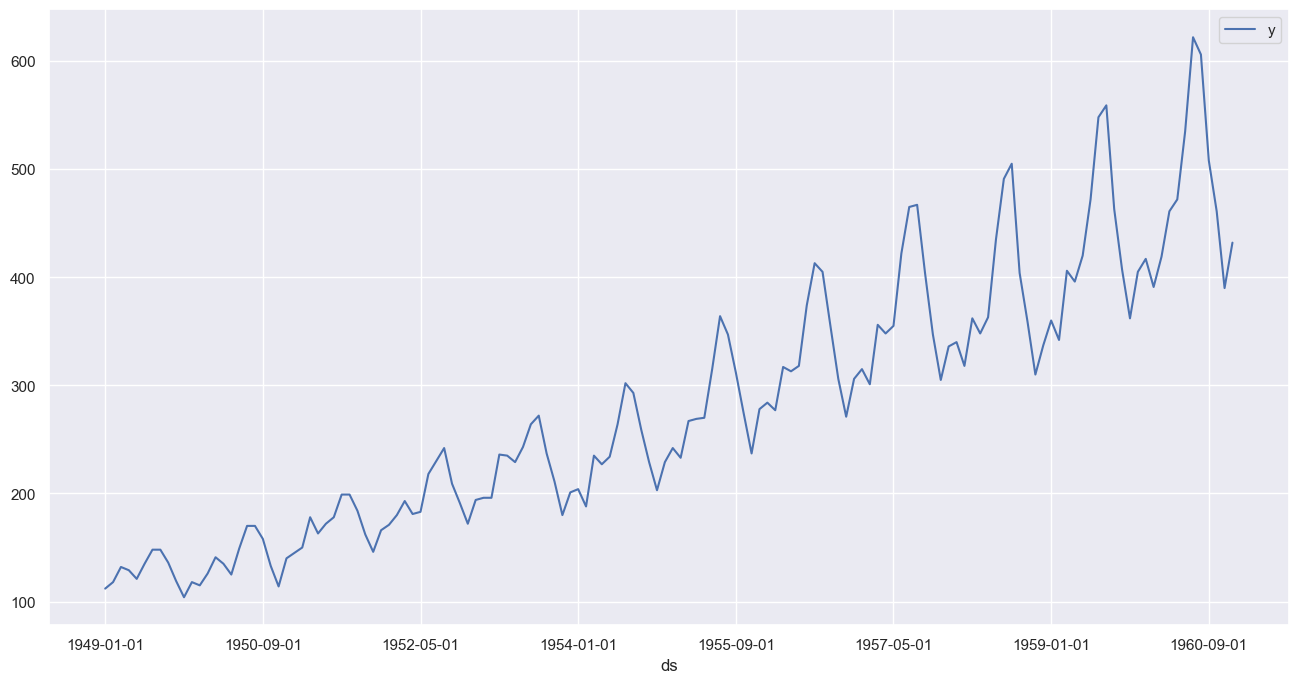

In [157]:
train_df['color'] = 'b'
train_df.set_index(time_col).plot(figsize=figsize, color=train_df['color']);

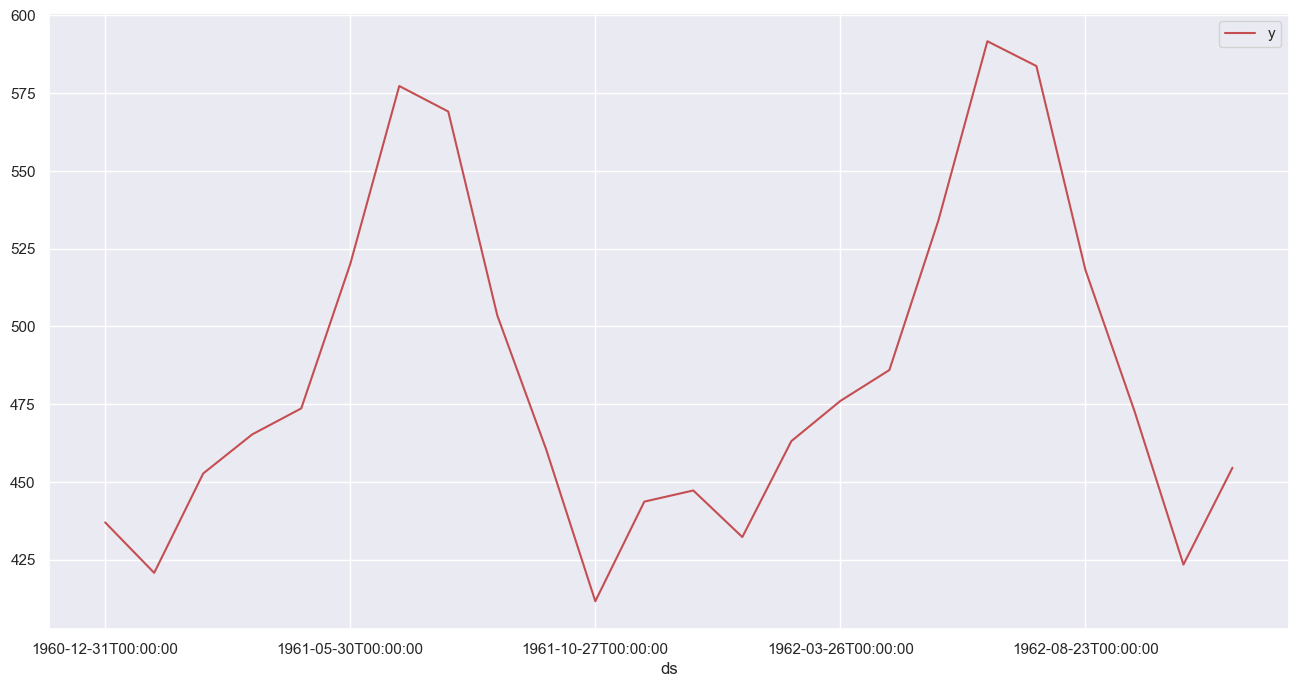

In [158]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [159]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [160]:
df.shape

(168, 3)

In [161]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [162]:
df.tail()

,ds,y,color
163,1962-07-24T00:00:00,583.670168,r
164,1962-08-23T00:00:00,518.121545,r
165,1962-09-22T00:00:00,472.796619,r
166,1962-10-22T00:00:00,423.386195,r
167,1962-11-21T00:00:00,454.523476,r


Plot combined train and forecast sets with the vertical black line as the cut-off

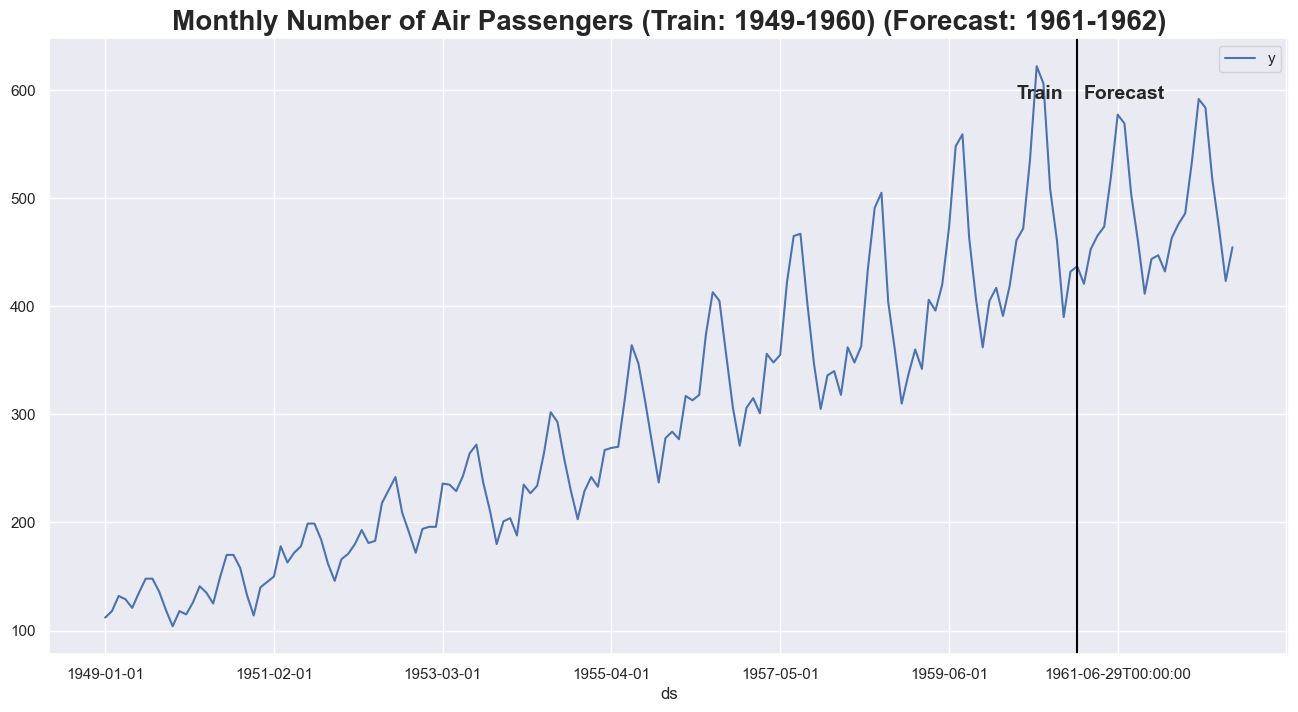

In [163]:
df.set_index(time_col).plot(figsize=figsize, color=df['color'])
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.title(label='Monthly Number of Air Passengers (Train: 1949-1960) (Forecast: 1961-1962)', fontweight='bold', fontsize=20)
plt.show();

In [164]:
print(train_data[-1] , forecast_df.head(1))

['1960-12-01', 432.0]                     ds           y color
0  1960-12-31T00:00:00  436.944575     r
